 ### Exploratory data analysis of AirBnB in New-York city for the year 2019.
 
 * Important note: Before you continue with this notebook, kindly take some time to go through the readme file so as to enlighten you about what this notebook is all about. Thanks
 

Importing the necessary libraries to be used for this project

In [2]:
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#ignore warnings
import warnings
warnings.filterwarnings('ignore')


Reading out the dataset.

In [3]:
df = pd.read_csv("../Dataset/AB_NYC_2019.csv")

In [4]:
# Checking the first five rows of the dataset

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
 df.shape

(48895, 16)

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#checking the dtypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Explanation of the columns
N.B---The meaning of all the columns in this dataset are explained below so try to read them.

##### Descriptors of the Host can be found below:

host_id: ID of the host

host_name: name of the host

calculated_host_listings_count: amount of listing per host

##### Descriptors of the Listings can be found below:

id: listing ID

name: name of the listing

room_type: listing space type

minimum_nights: minimum nights spent

availability_365: number of days when listing is available for booking

price: price of the listing in dollars

##### Descriptors of the Reviews can be found below:

number_of_reviews: number of reviews

last_review: latest review

reviews_per_month: number of reviews per month

##### Descriptors of the Location can be found below:

neighbourhood_group: location

neighbourhood: area

latitude: latitude coordinates

longitude: longitude coordinates

### Data cleaning
 * Check for missing values.


In [10]:
# Checking for missing values

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Trying to see if the missing values in name feature could be filled with some other features information.

df.loc[df["name"].isnull(),["id", "name", "host_name", "host_id"]]

,id,name,host_name,host_id
2854,1615764,NaN,Peter,6676776
3703,2232600,NaN,Anna,11395220
5775,4209595,NaN,Jesse,20700823
5975,4370230,NaN,Michaël,22686810
6269,4581788,NaN,Lucie,21600904
6567,4756856,NaN,Carolina,1832442
6605,4774658,NaN,Josh,24625694
8841,6782407,NaN,Huei-Yin,31147528
11963,9325951,NaN,Jonathan,33377685
12824,9787590,NaN,Miguel,50448556


Getting the `name` feature missing values with the help of other features in the dataset is not promising. Hence, I'll be filling the missing values of this feature with `Unknown`.

In [12]:
# Filling null values
df.fillna({'name':"Unknown"}, inplace=True)

In [13]:
# Trying to see if the host_name can be filled with the help of other features.

df.loc[df["host_name"].isnull(),["id", "name", "host_name", "host_id"]]

,id,name,host_name,host_id
360,100184,Bienvenue,NaN,526653
2700,1449546,Cozy Studio in Flatbush,NaN,7779204
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,NaN,919218
6075,4446862,Charming Room in Prospect Heights!,NaN,23077718
6582,4763327,"Luxurious, best location, spa inc'l",NaN,24576978
8163,6292866,Modern Quiet Gem Near All,NaN,32722063
8257,6360224,"Sunny, Private room in Bushwick",NaN,33134899
8852,6786181,R&S Modern Spacious Hideaway,NaN,32722063
9138,6992973,1 Bedroom in Prime Williamsburg,NaN,5162530
9817,7556587,Sunny Room in Harlem,NaN,39608626


`host name` can't be filled with the assistance of some other features present in this dataset. hence, i'll be filling the null values with `No name`.

In [14]:
df.fillna({'host_name':"No name"}, inplace=True)

##### Investigating the null values in `last_review` & `reviews_per_month` .

I'll be using the `number_of_reviews` feature to see what i can fill the missing values in `last_review` & `reviews_per_month` with. 

In [15]:
reviews_engineering = df.loc[df["last_review"].isnull(),["number_of_reviews","last_review","reviews_per_month"]]
reviews_engineering

,number_of_reviews,last_review,reviews_per_month
2,0,NaN,NaN
19,0,NaN,NaN
26,0,NaN,NaN
36,0,NaN,NaN
38,0,NaN,NaN
...,...,...,...
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN


In [16]:
reviews_engineering["number_of_reviews"].value_counts()

0    10052
Name: number_of_reviews, dtype: int64

 It's evident that the `last_review` & `reviews_per_month` features has a corresponding value of `0` with `number_of_reviews`. This simply means that this listing doesn't have a review yet and i will be filling the missing value of both features with `No Reviews yet` and `0` respectively.

In [17]:
# Filling missing values

df.fillna({'last_review':"No Reviews yet"}, inplace=True)
df.fillna({'reviews_per_month':0}, inplace=True)

In [18]:
# Null values cross-check.

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Investigating the price feature

In [23]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

I'm curious about the minimum value of price being `0` and i would like to investigating it below.

In [39]:
df.loc[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,No Reviews yet,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


### Observation
  * I observe that most of the price listings that are `0` have reviews which means someone had used them before and i think it is not possible for someone to rent our their apartment for free on Airbnb because at least a price would have been placed on them accordingly. I will suggest that there's an error in the price listings data compilation. So for this reason, i'll be filtering this dataset in such a way that the price of the listings are greater than zero `0`. 

In [44]:
# filtering out where price is equal to zero ( 0 ) and let the dataset starts from above ( 0 )

df = df.loc[df["price"] > 0]

# price feature descriptive stats

df["price"].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Question 1: Host with the most expensive listing and why is the listing that expensive?


In [28]:
df.loc[(df["price"]==10000), 
       (["name","room_type","price","neighbourhood","neighbourhood_group","host_name","host_id",
         "minimum_nights"])].sort_values(by="minimum_nights",ascending = False).reset_index(drop=True)

,name,room_type,price,neighbourhood,neighbourhood_group,host_name,host_id,minimum_nights
0,Furnished room in Astoria apartment,Private room,10000,Astoria,Queens,Kathrine,20582832,100
1,1-BR Lincoln Center,Entire home/apt,10000,Upper West Side,Manhattan,Jelena,72390391,30
2,Luxury 1 bedroom apt. -stunning Manhattan views,Entire home/apt,10000,Greenpoint,Brooklyn,Erin,5143901,5


#### Observation

   * From the above cell, we could see that there are three (3) hosts with the most expensive listing and the name of this hosts are `Kathrine`,`Jelena`,`Erin` respectively and the price of their listings is `$10,000` per night.
   * All these listings are luxurious apartment located in the one of the most expensive boroughs/Neighboorhood group in New-york. For example: The listing by `Jelena` is very expensive because the listing is located in Lincoln Center which happens to be a highly influential area in Manhattan known for hosting arts exhibitios,operas and ballet.
   
   link: https://en.wikipedia.org/wiki/Lincoln_Center

### Question 2:  Neighbourhood group with the most listings

In [29]:
most_listings = df.groupby("neighbourhood_group")[["name"]].count().sort_values(by="name",
                                                                                ascending = False).reset_index()
most_listings

,neighbourhood_group,name
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


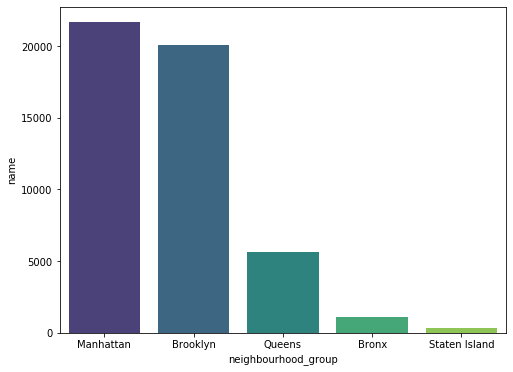

In [30]:
# Visualisation of Question 2

plt.figure(figsize=(8,6))
sns.barplot(data=most_listings, x=most_listings['neighbourhood_group'], y=most_listings['name'], 
            palette='viridis')

### Observation:

   * From the above visualization, most of the listings are located in `Manhattan` with `21661` listings, followed by `Brooklyn`, `Queens`, `Bronx` and `Staten island`.  

### Question 3: Median price listings per neighbourhood group

In [31]:
neigh_group =df.groupby("neighbourhood_group")[["price"]].median().sort_values(by="price",
                                                                               ascending=False).reset_index()
neigh_group

,neighbourhood_group,price
0,Manhattan,150
1,Brooklyn,90
2,Queens,75
3,Staten Island,75
4,Bronx,65


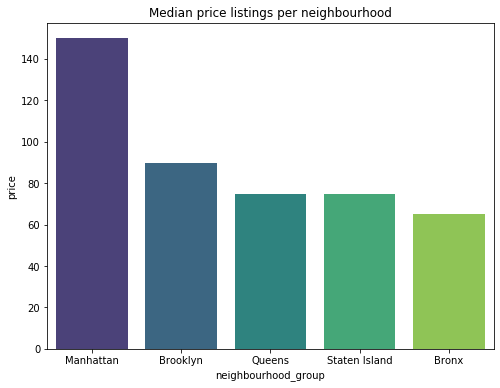

In [32]:
# Visualization of Question 3

plt.figure(figsize=(8,6))
plt.title("Median price listings per neighbourhood")
sns.barplot(data=neigh_group, x=neigh_group['neighbourhood_group'], y=neigh_group['price'], 
            palette='viridis')

### Observation

   * `Manhattan` has the highest median price of listings in this dataset which is `150` while `Bronx` has the lowest of them all with `65`

### Question 4: Top 10 hosts with most listings

In [33]:
top_host = df.groupby(["host_id","host_name"])[["name"]].count().sort_values(by="name",ascending=False).reset_index().head(10)
top_host.rename({"name":"count"},axis=1,inplace=True)
top_host

,host_id,host_name,count
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,16098958,Jeremy & Laura,96
5,12243051,Sonder,96
6,61391963,Corporate Housing,91
7,22541573,Ken,87
8,200380610,Pranjal,65
9,1475015,Mike,52


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

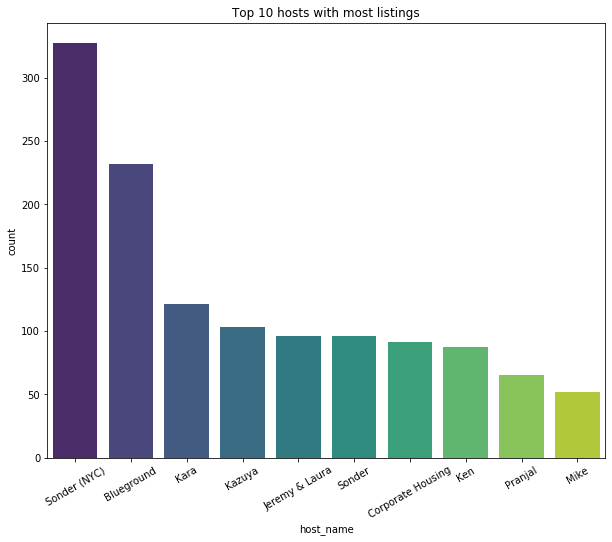

In [34]:
# Visualization of Question 4

plt.figure(figsize=(10,8))
sns.barplot(data=top_host, x=top_host['host_name'], y=top_host['count'], palette='viridis')
plt.title('Top 10 hosts with most listings')
plt.xticks(rotation=30)


### Observation
  * From the above visualization, it can be seen that `Sonder (NYC)` which is a hospitality company has the most listings in this dataset followed by `Blueground`, `kara` and so on.

### Question 5: Is there a correlation between minimum night stayed and their median price

In [35]:
minimum_stay = df.groupby("minimum_nights")[["price"]].median().reset_index()
minimum_stay

,minimum_nights,price
0,1,90.0
1,2,110.0
2,3,122.0
3,4,125.0
4,5,120.0
...,...,...
104,480,199.0
105,500,75.0
106,999,99.0
107,1000,400.0


### Observation
 * From the above cell, it can be seen that this dataset consists of both long stays and short stays and for this analysis, i will be narrowing my research to just `6` days of stay.
 

In [36]:
(minimum_stay.loc[minimum_stay["minimum_nights"] <= 6]).corr()

,minimum_nights,price
minimum_nights,1.000000,0.751333
price,0.751333,1.000000


 * There is a correlation between positive correlation between the minimum stay of 1 - 6 days and price 